In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset (correct path)
df = pd.read_csv("../data/claim_denial_dataset.csv")

df.head()



,ClaimID,Patient_Age,Insurance_Type,Provider_Type,Claim_Amount,Num_Procedures,Diagnosis_Category,Prior_Denials,Claim_Complexity,Submission_Type,Denied
0,1,69,Medicaid,Emergency,12276.46,7,Endocrine,1,Low,Electronic,0
1,2,32,Medicare,Primary Care,6861.38,5,Cardiology,2,High,Electronic,0
2,3,89,Medicaid,Primary Care,12006.12,5,Oncology,4,High,Electronic,1
3,4,78,HMO,Urgent Care,9731.36,5,Injury,2,Low,Electronic,1
4,5,38,PPO,Surgery,104.01,4,GI,2,Low,Electronic,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClaimID             5000 non-null   int64  
 1   Patient_Age         5000 non-null   int64  
 2   Insurance_Type      5000 non-null   object 
 3   Provider_Type       5000 non-null   object 
 4   Claim_Amount        5000 non-null   float64
 5   Num_Procedures      5000 non-null   int64  
 6   Diagnosis_Category  5000 non-null   object 
 7   Prior_Denials       5000 non-null   int64  
 8   Claim_Complexity    5000 non-null   object 
 9   Submission_Type     5000 non-null   object 
 10  Denied              5000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB


/var/folders/rn/qnb59m014dx_9w_7ny73ktzm0000gn/T/ipykernel_83334/595476810.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Denied", data=df, palette="mako")


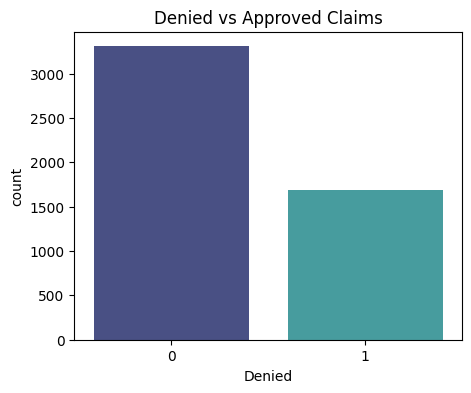

/var/folders/rn/qnb59m014dx_9w_7ny73ktzm0000gn/T/ipykernel_83334/595476810.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Insurance_Type", y="Denied", data=df, estimator=np.mean, palette="viridis")


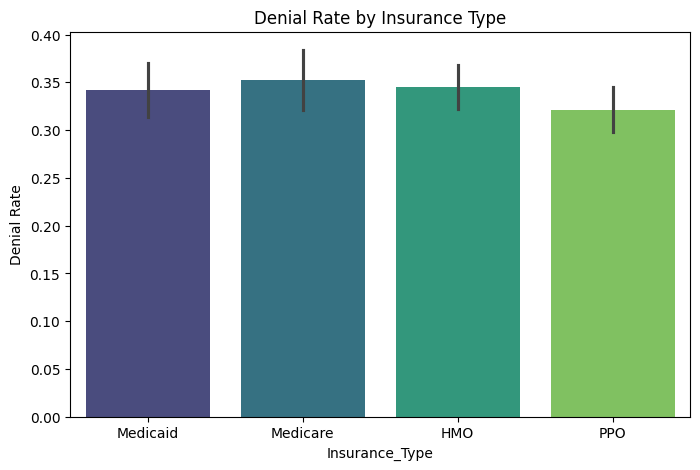

/var/folders/rn/qnb59m014dx_9w_7ny73ktzm0000gn/T/ipykernel_83334/595476810.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Provider_Type", y="Denied", data=df, estimator=np.mean, palette="cool")


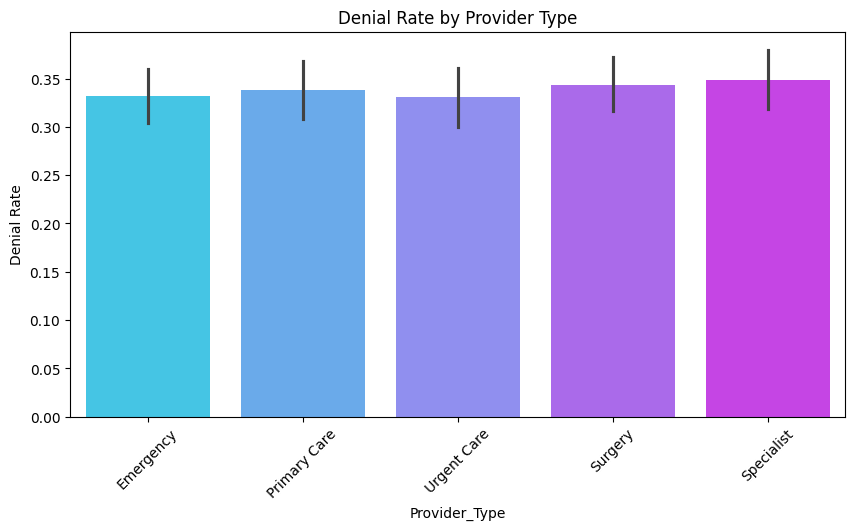

/var/folders/rn/qnb59m014dx_9w_7ny73ktzm0000gn/T/ipykernel_83334/595476810.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Claim_Complexity", y="Denied", data=df, estimator=np.mean, palette="flare")


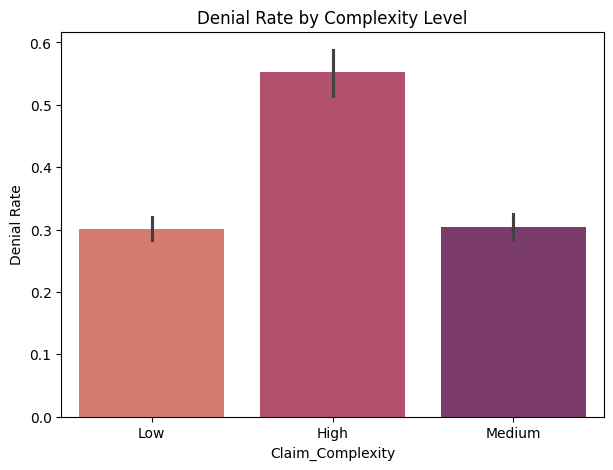

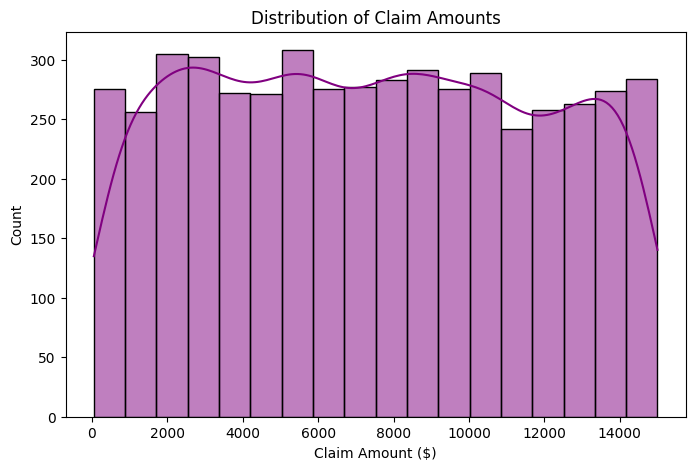

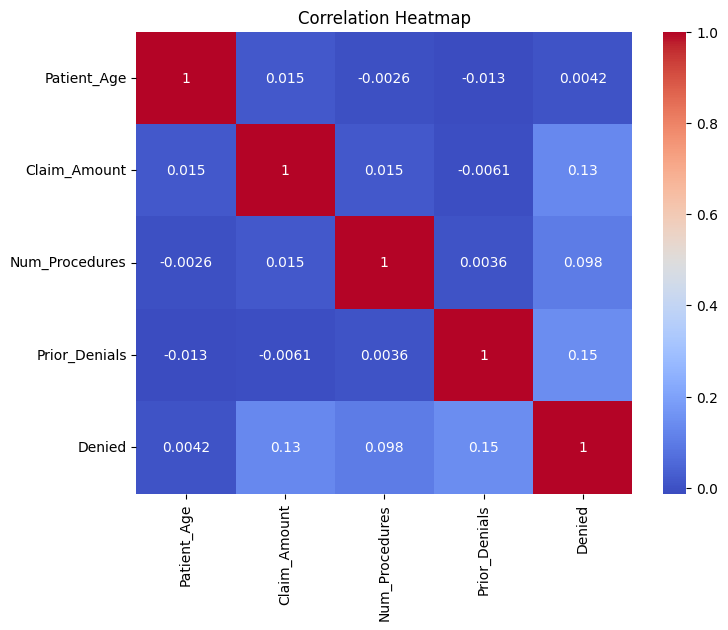

In [11]:
df.info()

df.describe()

df['Denied'].value_counts(normalize=True)

df.isnull().sum()

plt.figure(figsize=(5,4))
sns.countplot(x="Denied", data=df, palette="mako")
plt.title("Denied vs Approved Claims")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Insurance_Type", y="Denied", data=df, estimator=np.mean, palette="viridis")
plt.title("Denial Rate by Insurance Type")
plt.ylabel("Denial Rate")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Provider_Type", y="Denied", data=df, estimator=np.mean, palette="cool")
plt.title("Denial Rate by Provider Type")
plt.xticks(rotation=45)
plt.ylabel("Denial Rate")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x="Claim_Complexity", y="Denied", data=df, estimator=np.mean, palette="flare")
plt.title("Denial Rate by Complexity Level")
plt.ylabel("Denial Rate")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Claim_Amount"], kde=True, color="purple")
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount ($)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[["Patient_Age","Claim_Amount","Num_Procedures","Prior_Denials","Denied"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       662
           1       0.52      0.29      0.37       338

    accuracy                           0.67      1000
   macro avg       0.61      0.58      0.57      1000
weighted avg       0.64      0.67      0.64      1000



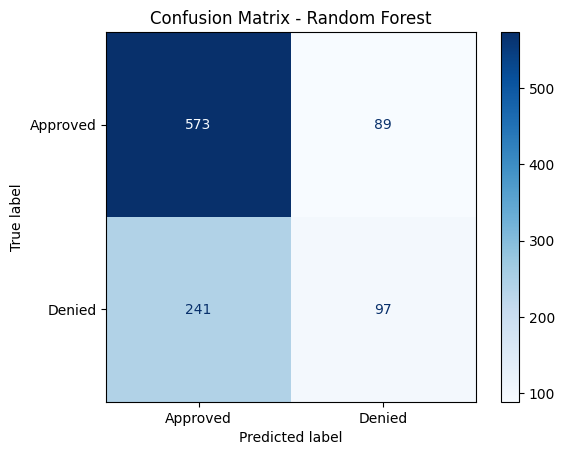

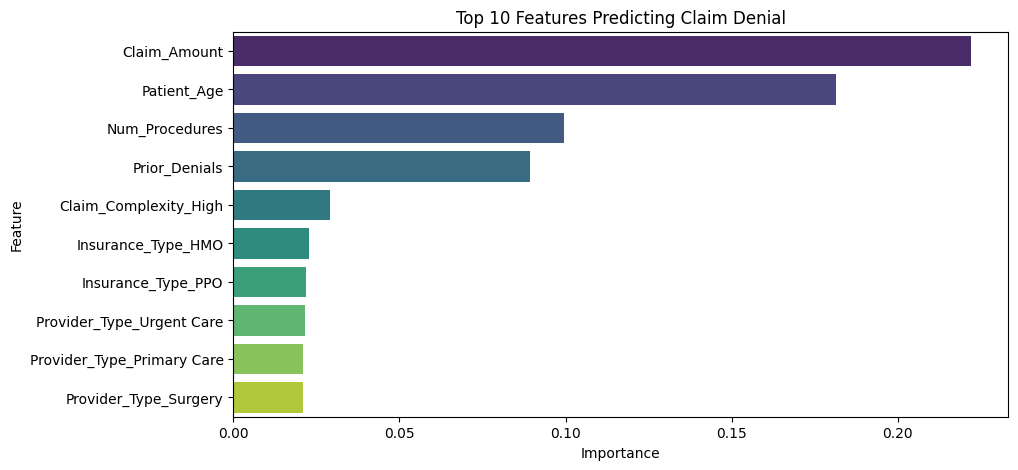

In [12]:
numeric_features = ["Patient_Age", "Claim_Amount", "Num_Procedures", "Prior_Denials"]
categorical_features = ["Insurance_Type", "Provider_Type", "Diagnosis_Category",
                        "Claim_Complexity", "Submission_Type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
# Separate features and target
X = df.drop("Denied", axis=1)
y = df["Denied"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

# Random Forest Model (better performance)
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Show evaluation metrics
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Approved","Denied"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


encoded_cat = rf_model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, encoded_cat])

importances = rf_model.named_steps["classifier"].feature_importances_
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
})

importance_df.sort_values("Importance", ascending=False).head(15)


top_features = (
    importance_df.sort_values("Importance", ascending=False).head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_features, x="Importance", y="Feature", hue="Feature", legend=False, palette="viridis")
plt.title("Top 10 Features Predicting Claim Denial")
plt.show()


In [13]:
import joblib
import os

# Create models folder if it doesn't exist
os.makedirs("../models", exist_ok=True)

# Save Random Forest model
joblib.dump(rf_model, "../models/random_forest_model.pkl")

# Save cleaned dataset
df.to_csv("../data/cleaned_claims_dataset.csv", index=False)

"Models and dataset saved successfully!"


'Models and dataset saved successfully!'